<a href="https://colab.research.google.com/github/alfinmaulani/skripsi/blob/master/4lstm_non_average.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

!pip install --upgrade scikit-learn

import io
import os
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
import gensim
import ast

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


load korpus

In [2]:
url1 = '/content/drive/MyDrive/dataisear(preputama).csv'
url2 = '/content/drive/MyDrive/dataisear(preptambah).csv'
df = pd.read_csv(url1)

In [3]:
temp=[]
for senten in df.dokumen:
  temp.append(ast.literal_eval(senten))
df.dokumen=temp

cari paling panjang dalam korpus

In [4]:
paling_panjang=0
i=0
ke=0
for x in df.dokumen:
  if paling_panjang<len(x):
    paling_panjang=len(x)
    kata=x
    ke=i
  i+=1
print(paling_panjang)
print(kata)
print(ke)

178
['a', 'few', 'days', 'back', 'i', 'was', 'waiting', 'for', 'the', 'bus', 'at', 'the', 'bus', 'stop', 'before', 'getting', 'into', 'the', 'bus', 'i', 'had', 'prepared', 'the', 'exact', 'amount', 'of', 'coins', 'to', 'pay', 'for', 'the', 'bus', 'fair', 'and', 'when', 'i', 'got', 'into', 'the', 'bus', 'i', 'put', 'these', 'coins', 'into', 'the', 'box', 'meant', 'to', 'collect', 'the', 'bus', 'fair', 'i', 'thought', 'that', 'i', 'had', 'paid', 'and', 'wanted', 'to', 'get', 'inside', 'however', 'the', 'bus', 'driver', 'called', 'me', 'and', 'asked', 'me', 'in', 'an', 'impolite', 'way', 'if', 'the', 'coins', 'were', 'stuck', 'at', 'the', 'opening', 'of', 'the', 'box', 'he', 'had', 'not', 'seen', 'me', 'paying', 'and', 'there', 'wasnt', 'a', 'stack', 'of', 'coins', 'in', 'the', 'box', 'i', 'could', 'not', 'understand', 'this', 'and', 'the', 'driver', 'kept', 'questioning', 'me', 'he', 'made', 'me', 'feel', 'angry', 'and', 'at', 'last', 'i', 'inserted', 'a', 'dollar', 'coin', 'in', 'the', 

In [5]:
df.dokumen.iloc[7443]

['a',
 'few',
 'days',
 'back',
 'i',
 'was',
 'waiting',
 'for',
 'the',
 'bus',
 'at',
 'the',
 'bus',
 'stop',
 'before',
 'getting',
 'into',
 'the',
 'bus',
 'i',
 'had',
 'prepared',
 'the',
 'exact',
 'amount',
 'of',
 'coins',
 'to',
 'pay',
 'for',
 'the',
 'bus',
 'fair',
 'and',
 'when',
 'i',
 'got',
 'into',
 'the',
 'bus',
 'i',
 'put',
 'these',
 'coins',
 'into',
 'the',
 'box',
 'meant',
 'to',
 'collect',
 'the',
 'bus',
 'fair',
 'i',
 'thought',
 'that',
 'i',
 'had',
 'paid',
 'and',
 'wanted',
 'to',
 'get',
 'inside',
 'however',
 'the',
 'bus',
 'driver',
 'called',
 'me',
 'and',
 'asked',
 'me',
 'in',
 'an',
 'impolite',
 'way',
 'if',
 'the',
 'coins',
 'were',
 'stuck',
 'at',
 'the',
 'opening',
 'of',
 'the',
 'box',
 'he',
 'had',
 'not',
 'seen',
 'me',
 'paying',
 'and',
 'there',
 'wasnt',
 'a',
 'stack',
 'of',
 'coins',
 'in',
 'the',
 'box',
 'i',
 'could',
 'not',
 'understand',
 'this',
 'and',
 'the',
 'driver',
 'kept',
 'questioning',
 'me',
 

load model word embedding

In [6]:
pakai_model=1

In [7]:
from gensim.models import word2vec
!pip install glove-python-binary
from glove import Glove
from glove import Corpus

     |████████████████████████████████| 948 kB 8.3 MB/s 


In [8]:
if pakai_model == 1:#load model word2vec
  model = gensim.models.word2vec.Word2Vec.load('/content/drive/MyDrive/korpusblogspertiga(preputama).w2v')

elif pakai_model == 2:#load model glove
  model=Glove.load('/content/drive/MyDrive/korpusblogspertiga(preputama).glove')

cek model word embedding

In [9]:
if pakai_model == 1:
  print(model.wv.vectors.shape)
elif pakai_model == 2:
  print(model.word_vectors.shape)

(1048781, 100)


In [ ]:
if pakai_model == 1:
  print(model.wv["moment"])
elif pakai_model == 2:
  print(model.word_vectors[model.dictionary['moment']])

average base ektraksi fitur

In [ ]:
import array
ekstrak=[]
temp=array.array('i',(0,)*100)

if pakai_model == 1:
  for senten in df.dokumen:
    for word in senten:
      temp=np.add(temp,model.wv[word])
    temp=temp/len(senten)
    ekstrak.append(temp)

elif pakai_model == 2:
  for senten in df.dokumen:
    for word in senten:
      temp=np.add(temp,model.word_vectors[model.dictionary[word]])
    temp=temp/len(senten)
    ekstrak.append(temp)

has_vec=ekstrak

cek

In [10]:
df.head()

,emosi,dokumen
0,joy,"[on, days, when, i, feel, close, to, my, partn..."
1,fear,"[every, time, i, imagine, that, someone, i, lo..."
2,anger,"[when, i, had, been, obviously, unjustly, trea..."
3,sadness,"[when, i, think, about, the, short, time, that..."
4,disgust,"[at, a, gathering, i, found, myself, involunta..."


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7516 entries, 0 to 7515
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emosi    7516 non-null   object
 1   dokumen  7516 non-null   object
dtypes: object(2)
memory usage: 117.6+ KB


bagi kolom klasifikasi

In [12]:
category = pd.get_dummies(df.emosi)
df_new = pd.concat([df, category], axis=1)
df_new = df_new.drop(columns='emosi')
df_new

,dokumen,anger,disgust,fear,guilt,joy,sadness,shame
0,"[on, days, when, i, feel, close, to, my, partn...",0,0,0,0,1,0,0
1,"[every, time, i, imagine, that, someone, i, lo...",0,0,1,0,0,0,0
2,"[when, i, had, been, obviously, unjustly, trea...",1,0,0,0,0,0,0
3,"[when, i, think, about, the, short, time, that...",0,0,0,0,0,1,0
4,"[at, a, gathering, i, found, myself, involunta...",0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
7511,"[two, years, back, someone, invited, me, to, b...",0,0,0,0,0,0,1
7512,"[i, had, taken, the, responsibility, to, do, s...",0,0,0,0,0,0,1
7513,"[i, was, at, home, and, i, heard, a, loud, sou...",0,0,1,0,0,0,0
7514,"[i, did, not, do, the, homework, that, the, te...",0,0,0,1,0,0,0


cek null

In [13]:
df_new.isnull().sum()

dokumen    0
anger      0
disgust    0
fear       0
guilt      0
joy        0
sadness    0
shame      0
dtype: int64

padding

In [14]:
max_features = paling_panjang+2

In [15]:
max_features

180

In [16]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(df.dokumen)

In [17]:
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences
# from tensorflow.keras.preprocessing.sequence import pad_sequences

# seq = tokenizer.texts_to_sequences(df.dokumen)
seq_test = tokenizer.texts_to_sequences(df.dokumen)

X_pad = sequence.pad_sequences(seq_test, padding='post', maxlen=max_features,)
# X_test_pad = pad_sequences(seq_test, padding='post',)

# train_padded = pad_sequences(train_sequences, maxlen=max_len, truncating="post", padding="post")

In [20]:
np.shape(X_pad)
# X_pad

(7516, 180)

In [27]:
X_pad[7443]

array([  3, 153,  79,   1,   7,  15,   2,  18,   2, 120, 118,   2,   1,
        11,   2,   9,   4,  15,   2,   6,   8,   1,  46, 118,   2,   1,
       118,   2,   4,   2,   1,  91,  13,   1,  11,   6,  96,   4, 107,
         2,  12,   6, 103,  12,  10,  24, 130, 179,   2,  36,  18,   2,
         9,   2,  20,  11,  14,  12,   6,  63,   3,   9,  10,   2,   1,
        69,  14,  31,   6,   2,  12,  20,  74,  12, 105,  90,   6,  18,
       143,   1,   3,  10,   2, 139,   4, 107, 101,  32,  40, 140,   1,
        86,  13,   1,  11,   3, 153,  10,   5,   6,  11,  14,  15,   2,
         2,  67,  35,  33,   1,  11,   2,   1,  69,  40,  12,   6,   1,
        22, 151,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0], d

In [28]:
X = X_pad
y = df_new[['anger', 'disgust', 'fear', 'guilt', 'joy', 'sadness', 'shame']].values
print(np.shape(X))
print(np.shape(y))

(7516, 180)
(7516, 7)


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2,)

In [30]:
print(np.shape(X_train))
print(np.shape(X_test))
print(np.shape(y_train))
print(np.shape(y_test))

(6012, 180)
(1504, 180)
(6012, 7)
(1504, 7)


In [32]:
from tensorflow.keras.layers import Embedding, Dense, LSTM, Dropout, Bidirectional
from tensorflow.keras.models import Sequential
import tensorflow as tf

# Creating model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=50))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.3))
model.add(Dense(82, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(7, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer= tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 50)          250000    
                                                                 
 dropout_4 (Dropout)         (None, None, 50)          0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              58880     
 nal)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 82)                10578     
                                                                 
 dropout_6 (Dropout)         (None, 82)                0         
                                                      

In [33]:
from keras import callbacks

earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 3, 
                                        restore_best_weights = True)

In [35]:
np.shape(X_train)

(6012, 180)

In [36]:
history = model.fit(X_train, y_train, epochs=30, 
                    validation_data=(X_test, y_test), 
                    callbacks=[earlystopping])

Epoch 1/30
188/188 [==============================] - 14s 21ms/step - loss: 1.9414 - accuracy: 0.1575 - val_loss: 1.9119 - val_accuracy: 0.2387
Epoch 2/30
188/188 [==============================] - 3s 17ms/step - loss: 1.7671 - accuracy: 0.3089 - val_loss: 1.6397 - val_accuracy: 0.3517
Epoch 3/30
188/188 [==============================] - 3s 17ms/step - loss: 1.6056 - accuracy: 0.3849 - val_loss: 1.5552 - val_accuracy: 0.4016
Epoch 4/30
188/188 [==============================] - 3s 17ms/step - loss: 1.5354 - accuracy: 0.4200 - val_loss: 1.5021 - val_accuracy: 0.4382
Epoch 5/30
188/188 [==============================] - 3s 17ms/step - loss: 1.5143 - accuracy: 0.4285 - val_loss: 1.4799 - val_accuracy: 0.4328
Epoch 6/30
188/188 [==============================] - 3s 17ms/step - loss: 1.4836 - accuracy: 0.4451 - val_loss: 1.4557 - val_accuracy: 0.4422
Epoch 7/30
188/188 [==============================] - 3s 17ms/step - loss: 1.4640 - accuracy: 0.4563 - val_loss: 1.4588 - val_accuracy: 0.438

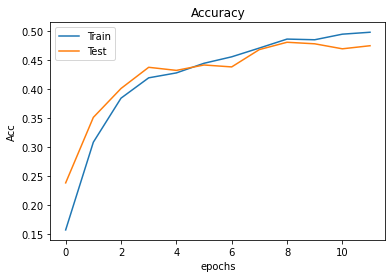

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.plot(history.history["accuracy"], label = "Train")
plt.plot(history.history["val_accuracy"], label = "Test")
plt.title("Accuracy")
plt.ylabel("Acc")
plt.xlabel("epochs")
plt.legend()
plt.show()

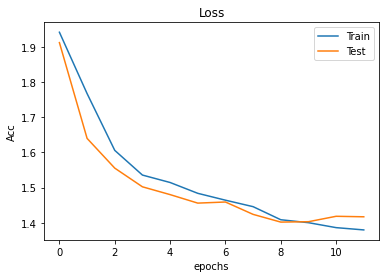

In [38]:
plt.figure()
plt.plot(history.history["loss"], label = "Train")
plt.plot(history.history["val_loss"], label = "Test")
plt.title("Loss")
plt.ylabel("Acc")
plt.xlabel("epochs")
plt.legend()
plt.show()

In [40]:
model.evaluate(X_test, y_test)

47/47 [==============================] - 1s 20ms/step - loss: 1.4018 - accuracy: 0.4814


[1.4017666578292847, 0.48138296604156494]